Importing the necessary libraries for analysis.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score


%matplotlib inline

Import the data to be analyzed.

In [2]:
dt = pd.read_excel('codeschoo.xls')

Remove columns that have more `NaN` that the define

In [3]:
pct_null_thresh = 0.55
max_number_of_nans = pct_null_thresh * dt.shape[0]
dt_sub1 = dt.drop(dt.columns[dt.apply(lambda col: col.isnull().sum() > max_number_of_nans)], axis=1)

In [4]:
list(dt_sub1.columns)

[u'Age',
 u'AttendedBootcamp',
 u'CityPopulation',
 u'CodeEventNone',
 u'CommuteTime',
 u'CountryCitizen',
 u'CountryLive',
 u'EmploymentField',
 u'EmploymentStatus',
 u'Gender',
 u'HasDebt',
 u'HasFincialDependents',
 u'HasHighSpdInternet',
 u'HasServedInMilitary',
 u'HoursLearning',
 u'ID.x',
 u'ID.y',
 u'Income',
 u'IsEthnicMinority',
 u'IsReceiveDiabilitiesBenefits',
 u'IsSoftwareDev',
 u'IsUnderEmployed',
 u'JobPref',
 u'LanguageAtHome',
 u'MoneyForLearning',
 u'MonthsProgramming',
 u'NetworkID',
 u'Part1EndTime',
 u'Part1StartTime',
 u'Part2EndTime',
 u'Part2StartTime',
 u'PodcastNone',
 u'ResourceCodecademy',
 u'ResourceFCC',
 u'SchoolDegree',
 u'SchoolMajor']

In [5]:
dt_sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 36 columns):
Age                             13613 non-null float64
AttendedBootcamp                15380 non-null float64
CityPopulation                  13630 non-null object
CodeEventNone                   8900 non-null float64
CommuteTime                     8339 non-null float64
CountryCitizen                  13654 non-null object
CountryLive                     13610 non-null object
EmploymentField                 7608 non-null object
EmploymentStatus                12904 non-null object
Gender                          13746 non-null object
HasDebt                         13610 non-null float64
HasFincialDependents            13640 non-null float64
HasHighSpdInternet              13625 non-null float64
HasServedInMilitary             13550 non-null float64
HoursLearning                   14942 non-null float64
ID.x                            15620 non-null object
ID.y                 

In [16]:
dt_sub1.loc[:, dt_sub1.dtypes == object].columns

Index([u'CityPopulation', u'CountryCitizen', u'CountryLive',
       u'EmploymentField', u'EmploymentStatus', u'Gender', u'ID.x', u'ID.y',
       u'JobPref', u'LanguageAtHome', u'NetworkID', u'SchoolDegree',
       u'SchoolMajor'],
      dtype='object')

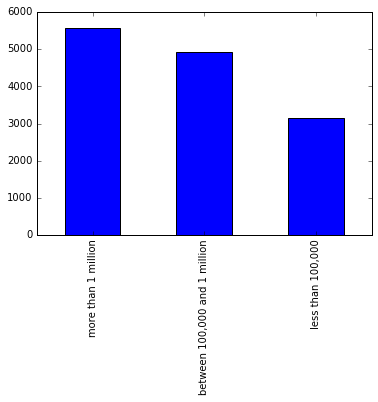

In [32]:
dt_sub1.CityPopulation.value_counts().plot(kind='bar')

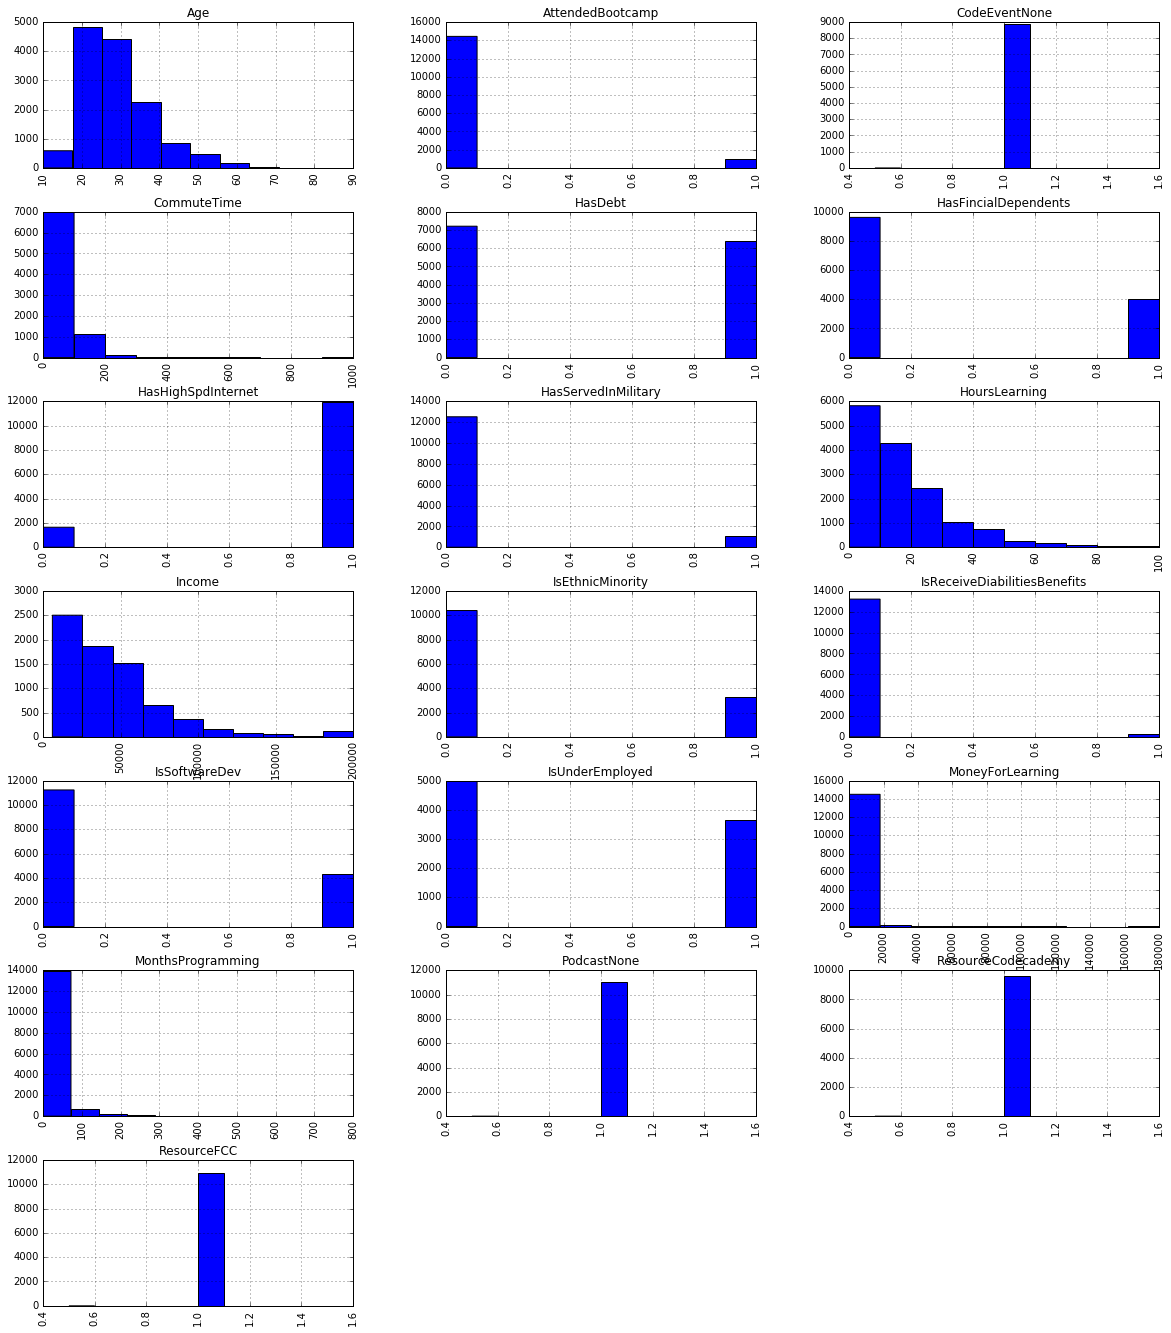

In [49]:
dt_sub.hist(layout = (12,3), xrot = 90, figsize  = (20, 40));

After removing the columns with a high amount of `NaN`, I reviewed the remaining columns and conluded that the following variables make sense to use in the regression:
* `Age`
* `CountryCitizen`
* `Gender`
* `Income`
* `MonthsProgramming`
* `SchoolDegree`

Create a sub-dataframe with the independent variables to be used in the regression.  
In addition, drop any observation that has an `NaN` or blank and simplify the data to only include `male` and `female` genders.

In [15]:
dt_sub2 = dt_sub1[['Age', 'CountryCitizen', 'Gender', 'Income', 'MonthsProgramming', 'SchoolDegree']]
dt_sub_noNA = dt_sub2.dropna()

In [16]:
dt_sub_noNA = dt_sub_noNA[~dt_sub_noNA['Gender'].isin(['genderqueer','agender', 'trans'])]

Convert all `CountryCitizen` values to `1` if equal to `'United States of America'`.  Else, `0`.

Convert all `SchoolDegree` values to a number `1` if coder has completed a four-year degree or higher, else `0`.

Convert `male` and `female` to `1` and `0`, respectively.


In [17]:
dt_sub_noNA['CountryCitizen'] = (dt_sub_noNA['CountryCitizen'] == 'United States of America').astype(int)

dt_sub_noNA['SchoolDegree'] = (dt_sub_noNA['SchoolDegree'].isin(["Ph.D.", "master's degree (non-professiol)", "professiol degree (MBA, MD, JD, etc.)", "bachelor's degree"])).astype(int)

dt_sub_noNA['Gender'].replace(to_replace=["male", "female"], value=[1, 0], inplace=True)

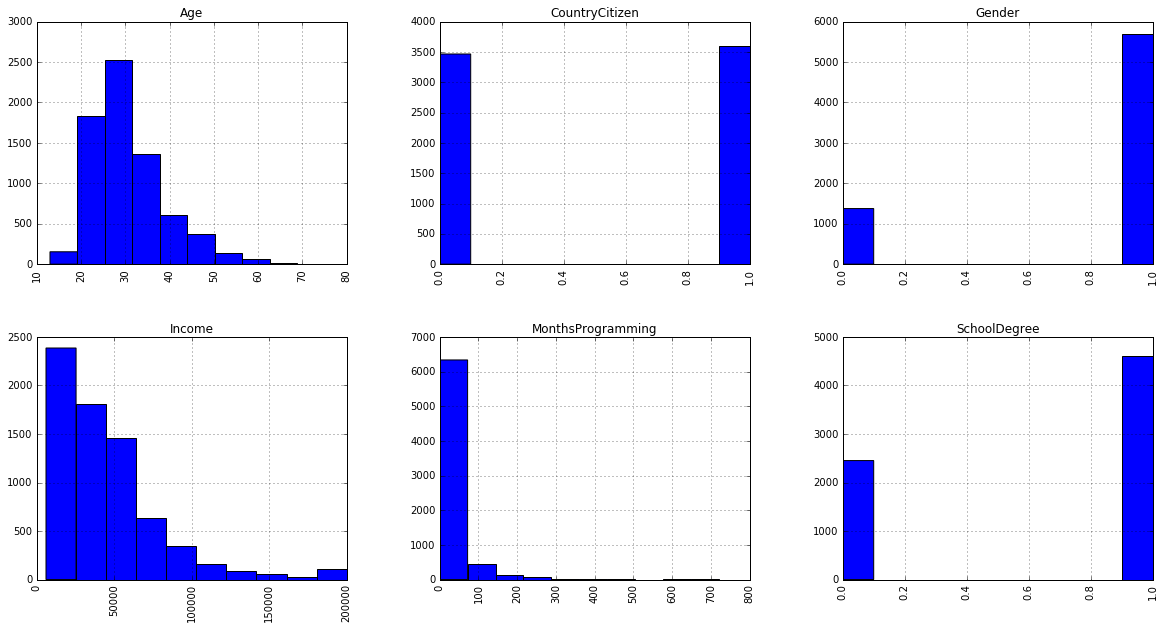

In [39]:
dt_sub_noNA.hist(layout = (2,3), xrot = 90, figsize  = (20, 10));

Create Training and Testing datasets.

In [40]:
(X_train, X_test, y_train, y_test) = train_test_split(dt_sub_noNA[['CountryCitizen', 'Gender', 'Age', 'MonthsProgramming','SchoolDegree']], dt_sub_noNA['Income'],random_state=867, train_size=0.7)

Run `OLS` regression and print out a summary report.

In [41]:
#X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2085.
Date:                Thu, 13 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:44:58   Log-Likelihood:                -58400.
No. Observations:                4944   AIC:                         1.168e+05
Df Residuals:                    4939   BIC:                         1.168e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
CountryCitizen     1.488e+04    936.97

Model validation with testing set.

In [42]:
#X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)
print("Mean squared error: {:.2f}".format(np.mean((results.predict(X_test) - y_test) ** 2)))

print('\nThe coefficients are: \n{}'.format(results.params))

Mean squared error: 1009758272.78

The coefficients are: 
CountryCitizen       14878.305474
Gender                5414.814198
Age                    765.187258
MonthsProgramming      148.555956
SchoolDegree          8048.271856
dtype: float64


# Validation with sklearn

In [43]:
clf = LinearRegression()
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test, y_test))

Coefficients: 
 [ 14791.86574234   5118.93697331    742.64744109    149.05303962
   7906.90240264]
Mean squared error: 1009699579.85
Variance score: 0.18
